In [1]:
import pandas as pd
import datetime


In [38]:
#to load the data back in use
df_full = pd.read_pickle('original_turnstile_df.pkl')

In [39]:
#create a new column with using the date & time columns,
# then turning it into a datetime object
df_full['DateTime'] = pd.to_datetime(df_full.DATE.astype(str) + " " + df_full.TIME.astype(str))

In [40]:
#remove whitespace from the column titles
df_full.columns = [column.strip() for column in df_full.columns]
df_full.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS', 'DateTime'],
      dtype='object')

In [41]:
#grouping by turnstiles locations and summing entries/exits by date
# note that SCP is the only location specific column that changes
turnstiles_df = df_full.groupby(['C/A', 'UNIT', 'STATION', 'LINENAME', 'SCP', 'DATE', 'DateTime' ]).sum().reset_index()


In [42]:
turnstiles_df.head(1000)

,C/A,UNIT,STATION,LINENAME,SCP,DATE,DateTime,ENTRIES,EXITS
0,A002,R051,59 ST,NQR456W,02-00-00,08/29/2020,2020-08-29 00:00:00,7450785,2533372
1,A002,R051,59 ST,NQR456W,02-00-00,08/29/2020,2020-08-29 04:00:00,7450788,2533375
2,A002,R051,59 ST,NQR456W,02-00-00,08/29/2020,2020-08-29 08:00:00,7450798,2533391
3,A002,R051,59 ST,NQR456W,02-00-00,08/29/2020,2020-08-29 12:00:00,7450826,2533423
4,A002,R051,59 ST,NQR456W,02-00-00,08/29/2020,2020-08-29 16:00:00,7450910,2533454
...,...,...,...,...,...,...,...,...,...
995,A002,R051,59 ST,NQR456W,02-03-05,09/16/2020,2020-09-16 20:00:00,12005509,1445930
996,A002,R051,59 ST,NQR456W,02-03-05,09/17/2020,2020-09-17 00:00:00,12005628,1445931
997,A002,R051,59 ST,NQR456W,02-03-05,09/17/2020,2020-09-17 04:00:00,12005635,1445931
998,A002,R051,59 ST,NQR456W,02-03-05,09/17/2020,2020-09-17 08:00:00,12005677,1445966


In [43]:
#check for duplicated values
df_full.groupby(['C/A', 'UNIT', 'STATION', 'LINENAME', 'SCP', 'DateTime' ])['ENTRIES'].count().reset_index().sort_values('ENTRIES', ascending = False).head(15)


,C/A,UNIT,STATION,LINENAME,SCP,DateTime,ENTRIES
610077,R627,R063,SUTTER AV-RUTLD,3,00-00-01,2020-09-07 16:00:00,2
499482,R245A,R051,59 ST,456NQRW,01-00-00,2020-09-12 00:00:00,2
320326,N532,R129,BERGEN ST,FG,00-00-01,2020-08-31 17:00:00,2
87,A002,R051,59 ST,NQR456W,02-00-00,2020-09-12 12:00:00,2
320201,N532,R129,BERGEN ST,FG,00-00-00,2020-08-31 17:00:00,2
609953,R627,R063,SUTTER AV-RUTLD,3,00-00-00,2020-09-08 00:00:00,2
610079,R627,R063,SUTTER AV-RUTLD,3,00-00-01,2020-09-08 00:00:00,2
609951,R627,R063,SUTTER AV-RUTLD,3,00-00-00,2020-09-07 16:00:00,2
499484,R245A,R051,59 ST,456NQRW,01-00-00,2020-09-12 08:00:00,2
499483,R245A,R051,59 ST,456NQRW,01-00-00,2020-09-12 04:00:00,2


Looks like 12 entries have duplicate data all coming from 3 stations, check a few of these out.

It seems like RECOVR AUD has weird values where there is duplicated data, so I will drop those values

Additionally, will check if there are weird values in other places there is a RECOVR AUD value

In [44]:
#RECOVR AUD rows have weird data so lets just drop them all

df_full = df_full[df_full.DESC=='REGULAR']

## find the daily entries

The turnstile counter does not reset each day, it just keeps increasing the count. In order to find the daliy entries, subtract the previous day from the current day.

In [45]:
#grouping by turnstiles locations and summing entries/exits by date
# note that SCP is the only location specific column that changes
stations_df = df_full.groupby(['C/A', 'UNIT', 'STATION', 'LINENAME', 'DATE']).sum().reset_index()


In [46]:
stations_df.head()

,C/A,UNIT,STATION,LINENAME,DATE,ENTRIES,EXITS
0,A002,R051,59 ST,NQR456W,08/29/2020,353663977,198126524
1,A002,R051,59 ST,NQR456W,08/30/2020,353674428,198135110
2,A002,R051,59 ST,NQR456W,08/31/2020,353686433,198148360
3,A002,R051,59 ST,NQR456W,09/01/2020,353707933,198166598
4,A002,R051,59 ST,NQR456W,09/02/2020,353730492,198185494


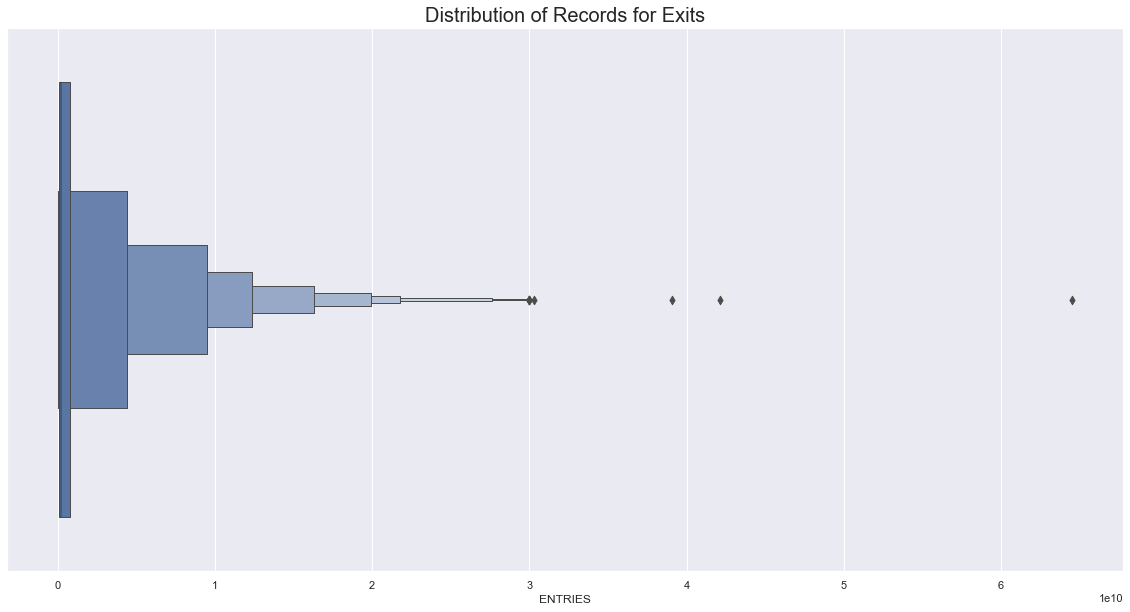

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# plot a distribution plot for the frequency of Exits records
plt.figure(figsize=(20,10))
#plt.ticklabel_format(style='plain', axis='x')
g = sns.boxenplot(x='ENTRIES', data=stations_df)
plt.title("Distribution of Records for Exits", fontsize=20);

Drop outliers

In [48]:
#everything greater than 2.5mill
stations_df = stations_df[stations_df.ENTRIES<=27500000000]

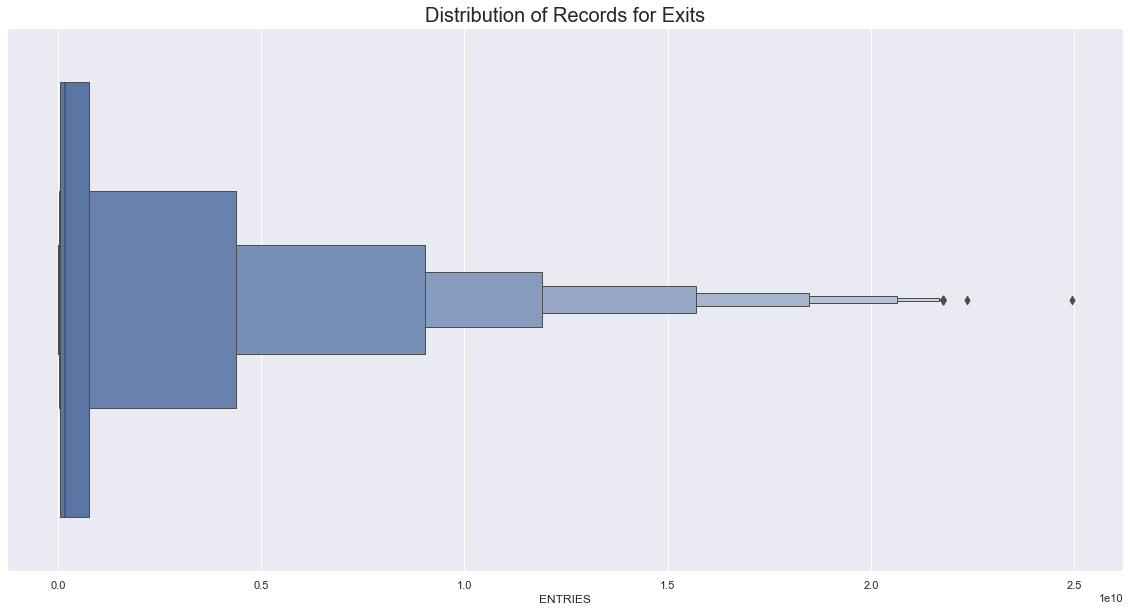

In [49]:
# plot a distribution plot for the frequency of Exits records
plt.figure(figsize=(20,10))
#plt.ticklabel_format(style='plain', axis='x')
g = sns.boxenplot(x='ENTRIES', data=stations_df)
plt.title("Distribution of Records for Exits", fontsize=20);

In [50]:
#create two new columns that are the previous day with associated 
#number of entries
stations_df[['Previous_date', 'Previous_Entries']] = (stations_df.groupby(["C/A", "UNIT", "STATION", "LINENAME"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))

<ipython-input-50-3c7abcf33e93>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  stations_df[['Previous_date', 'Previous_Entries']] = (stations_df.groupby(["C/A", "UNIT", "STATION", "LINENAME"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))


In [51]:
stations_df.head()

,C/A,UNIT,STATION,LINENAME,DATE,ENTRIES,EXITS,Previous_date,Previous_Entries
0,A002,R051,59 ST,NQR456W,08/29/2020,353663977,198126524,NaN,NaN
1,A002,R051,59 ST,NQR456W,08/30/2020,353674428,198135110,08/29/2020,353663977.0
2,A002,R051,59 ST,NQR456W,08/31/2020,353686433,198148360,08/30/2020,353674428.0
3,A002,R051,59 ST,NQR456W,09/01/2020,353707933,198166598,08/31/2020,353686433.0
4,A002,R051,59 ST,NQR456W,09/02/2020,353730492,198185494,09/01/2020,353707933.0


In [52]:
#drop the first row associated with each new station in order to 
# not combine data for different turnstiles
stations_df.dropna(subset = ['Previous_date'], axis = 0, inplace = True)

In [53]:
stations_df.head()

,C/A,UNIT,STATION,LINENAME,DATE,ENTRIES,EXITS,Previous_date,Previous_Entries
1,A002,R051,59 ST,NQR456W,08/30/2020,353674428,198135110,08/29/2020,353663977.0
2,A002,R051,59 ST,NQR456W,08/31/2020,353686433,198148360,08/30/2020,353674428.0
3,A002,R051,59 ST,NQR456W,09/01/2020,353707933,198166598,08/31/2020,353686433.0
4,A002,R051,59 ST,NQR456W,09/02/2020,353730492,198185494,09/01/2020,353707933.0
5,A002,R051,59 ST,NQR456W,09/03/2020,353753348,198204420,09/02/2020,353730492.0


In [54]:
#make sure that the count is actually increasing each day
# i.e., we should have count(yesterday) < count(today)
# but it looks like that's not the case
counter_mask = (stations_df['ENTRIES'] < stations_df['Previous_Entries'])
stations_df[counter_mask]

,C/A,UNIT,STATION,LINENAME,DATE,ENTRIES,EXITS,Previous_date,Previous_Entries
59,A007,R079,5 AV/59 ST,NQRW,09/15/2020,753398109,34731169,09/14/2020,1.130088e+09
77,A010,R080,57 ST-7 AV,NQRW,09/12/2020,375562005,140323051,09/11/2020,3.975106e+08
111,A013,R081,49 ST,NQRW,09/04/2020,152602116,307887908,09/03/2020,1.780288e+08
150,A015,R081,49 ST,NQRW,09/01/2020,198702519,110010218,08/31/2020,2.117487e+08
232,A025,R023,34 ST-HERALD SQ,BDFMNQRW,08/30/2020,7909459657,11414629126,08/29/2020,7.910489e+09
...,...,...,...,...,...,...,...,...,...
15551,R727,R430,PELHAM PKWY,5,09/16/2020,2220940437,969075163,09/15/2020,2.658626e+09
15620,S101,R070,ST. GEORGE,1,09/01/2020,109305378,89976,08/31/2020,1.215648e+08
15631,S101,R070,ST. GEORGE,1,09/12/2020,101372921,79540,09/11/2020,1.216425e+08
15670,S102,R165,TOMPKINSVILLE,1,09/09/2020,7542070,209631,09/08/2020,1.508286e+07


In [55]:
#how many tursntiles have this issue?
stations_df[counter_mask].groupby(["C/A", "UNIT", "STATION", "LINENAME"]).size()


C/A    UNIT  STATION          LINENAME
A007   R079  5 AV/59 ST       NQRW        1
A010   R080  57 ST-7 AV       NQRW        1
A013   R081  49 ST            NQRW        1
A015   R081  49 ST            NQRW        1
A025   R023  34 ST-HERALD SQ  BDFMNQRW    4
                                         ..
R641   R210  BEVERLY RD       25          1
R727   R430  PELHAM PKWY      5           2
S101   R070  ST. GEORGE       1           2
S102   R165  TOMPKINSVILLE    1           1
TRAM1  R468  RIT-MANHATTAN    R           1
Length: 352, dtype: int64

Looks like 352 turnstiles have the reverse counter problem.

This just means that the difference will be negative. we can fix this by considering the absolute value

# Questions

notice that the last few rows had the same values for entries and previous entries

also, our max had only 24 entries the first day and ~900,000 the next.

### How to deal with this type of inconsistent data?

- choose some min and max difference threshold to place on day to day differences?

- put an upper limit that we say is an unreasonable amount?

- lower limit?

In [56]:
#try vinny's method of resetting the counter manually if it is too 
# high

def daily_count2(row, max_count):
    count = row['ENTRIES'] - row['Previous_Entries']
    
    if count < 0:
        count *= -1
        
    if count > max_count:
        print(row["ENTRIES"], row["Previous_Entries"])
        count = min(row["ENTRIES"], row["Previous_Entries"])
        
    if count > max_count:
        return 0
    return count

stations_df['Daily_Entries'] = stations_df.apply(daily_count2, axis=1, max_count=10000)


353674428 353663977.0
353686433 353674428.0
353707933 353686433.0
353730492 353707933.0
353753348 353730492.0
353776187 353753348.0
353797210 353776187.0
353811522 353797210.0
353823279 353811522.0
353838817 353823279.0
353862769 353838817.0
353887500 353862769.0
353910700 353887500.0
353986703 353910700.0
354110828 353986703.0
354126794 354110828.0
354152770 354126794.0
354180677 354152770.0
354209174 354180677.0
354236735 354209174.0
126862726 126851096.0
126879547 126862726.0
126896375 126879547.0
126912882 126896375.0
126929501 126912882.0
126944247 126929501.0
126955642 126944247.0
126977962 126965334.0
126995545 126977962.0
127013057 126995545.0
127029837 127013057.0
127045293 127029837.0
127056093 127045293.0
127067034 127056093.0
127084898 127067034.0
127103620 127084898.0
127122362 127103620.0
127140970 127122362.0
1130088150 753388160.0
753398109 1130088150.0
397247804 397234600.0
397263905 397247804.0
397287199 397263905.0
397311973 397287199.0
397337144 397311973.0
39736170

169659505 169647186.0
169669920 169659505.0
169688128 169677941.0
169700401 169688128.0
169712990 169700401.0
169725664 169712990.0
169738311 169725664.0
599058921 599046856.0
599071324 599058921.0
599084470 599071324.0
599097934 599084470.0
599108534 599097934.0
599135299 599124137.0
599148988 599135299.0
599162559 599148988.0
599176008 599162559.0
599186961 599176008.0
599206919 599195430.0
599221366 599206919.0
599236218 599221366.0
599250800 599236218.0
599265243 599250800.0
138128947 138118554.0
138142596 138128947.0
138156752 138142596.0
138171271 138156752.0
138185123 138171271.0
138196234 138185123.0
138224923 138213594.0
138238892 138224923.0
138252980 138238892.0
138267309 138252980.0
138279251 138267309.0
138299414 138287829.0
138314347 138299414.0
138329553 138314347.0
138344838 138329553.0
138359953 138344838.0
56829441 56818849.0
56840671 56829441.0
56852056 56840671.0
56863271 56852056.0
56908675 56896666.0
56920414 56908675.0
56932301 56920414.0
56942435 56932301.0
5697

68869370 68858201.0
68880517 68869370.0
68918014 68906730.0
68929614 68918014.0
68940981 68929614.0
68972263 68960945.0
68984011 68972263.0
68995871 68984011.0
69008072 68995871.0
167584463 167573809.0
167598962 167584463.0
167613762 167598962.0
167628672 167613762.0
167643221 167628672.0
167653899 167643221.0
167679910 167668199.0
167695323 167679910.0
167711043 167695323.0
167726802 167711043.0
167738180 167726802.0
167756919 167745170.0
167773017 167756919.0
167789528 167773017.0
167806085 167789528.0
167822776 167806085.0
111771242 111759739.0
101388937 111771242.0
91006537 101388937.0
111807234 91006537.0
101423169 111807234.0
91036707 101423169.0
80648561 91036707.0
91053129 80648561.0
111857057 91053129.0
101473391 111857057.0
111881778 101473391.0
111893193 111881778.0
111912100 111901931.0
111924809 111912100.0
111938011 111924809.0
111951137 111938011.0
111964576 111951137.0
199717579 199705636.0
199729963 199717579.0
199742364 199729963.0
199755143 199742364.0
199766451 1997

26962063 23106587.0
23113505 26962063.0
336030104 336018890.0
336044469 336030104.0
336063850 336044469.0
336084632 336063850.0
336105347 336084632.0
336126181 336105347.0
336149477 336126181.0
336174258 336149477.0
336198782 336174258.0
336224860 336198782.0
336246405 336224860.0
336267179 336246405.0
336287871 336267179.0
336311189 336287871.0
336338172 336311189.0
336360807 336338172.0
336382597 336360807.0
336404495 336382597.0
336426912 336404495.0
336449680 336426912.0
36437534 43675082.0
43682674 36437534.0
125588916 125576011.0
125606697 125588916.0
125629077 125606697.0
125651627 125629077.0
125675015 125651627.0
125698944 125675015.0
125718900 125698944.0
125734199 125718900.0
125749005 125734199.0
2559878251 125749005.0
104830087 2559878251.0
125818930 104830087.0
125843706 125818930.0
125865365 125843706.0
125881467 125865365.0
125901275 125881467.0
125926981 125901275.0
125953287 125926981.0
125979943 125953287.0
126006075 125979943.0
6157567381 7389070125.0
7389094181 615

11917350011 11917311796.0
11917387388 11917350011.0
456221302 304146628.0
354841350 456221302.0
304158417 354841350.0
304171036 304158417.0
304183378 304171036.0
304195772 304183378.0
253515280 304212562.0
304230533 253515280.0
304242685 304230533.0
304254741 304242685.0
304264857 304254741.0
304285934 304273495.0
304298705 304285934.0
304311795 304298705.0
304325095 304311795.0
11089732175 11089721464.0
11089743262 11089732175.0
11089753824 11089743262.0
11089764405 11089753824.0
11089848072 11089837989.0
11089858180 11089848072.0
11089868322 11089858180.0
219117100 219104258.0
219130027 219117100.0
219143379 219130027.0
219156764 219143379.0
219170142 219156764.0
219198377 219188162.0
219101753 219198377.0
219231874 219101753.0
219247785 219231874.0
219262051 219247785.0
219296561 219281015.0
219312670 219296561.0
219328608 219312670.0
219344440 219328608.0
1720941336 1720920760.0
1720962796 1720941336.0
1720984715 1720962796.0
1721005859 1720984715.0
1721021795 1721005859.0
17210654

20099324 21681740.0
21833968 20099324.0
21208442 21833968.0
22237393 21208442.0
19777424 22237393.0
21721976 19777424.0
21797820 21721976.0
20129843 21797820.0
22073888 20129843.0
21292612 22073888.0
22365518 21292612.0
5964459 6417025.0
5874211 5964459.0
6433312 5874211.0
6460969 6433312.0
5986523 6460969.0
5897675 5986523.0
6459166 5897675.0
6005595 6459166.0
5915154 6005595.0
6475548 5915154.0
6504705 6475548.0
6027654 6504705.0
5937643 6027654.0
6502709 5937643.0
6048016 6502709.0
5956793 6048016.0
6521592 5956793.0
6552325 6521592.0
6073320 6552325.0
5983258 6073320.0
2495790 2573741.0
2551391 2495790.0
2589321 2551391.0
2512655 2589321.0
2602761 2512655.0
2684139 2602761.0
2614564 2684139.0
2539082 2614564.0
2589676 2539082.0
2630498 2589676.0
2555317 2630498.0
2621253 2555317.0
2746155 2621253.0
2656685 2746155.0
2582504 2656685.0
2628436 2582504.0
2674998 2628436.0
2796576 2674998.0
2450555 2796576.0
2810713 2450555.0
10051643 9412157.0
9481752 10051643.0
8989794 9481752.0
1007

40687059 33902612.0
50155056 50144960.0
50167690 50155056.0
50183017 50167690.0
50198806 50183017.0
50215487 50198806.0
50232668 50215487.0
50248089 50232668.0
41884468 50248089.0
50272056 41884468.0
50286498 50272056.0
50303336 50286498.0
50320542 50303336.0
50338205 50320542.0
50354932 50338205.0
50367965 50354932.0
50382323 50367965.0
50399626 50382323.0
50417630 50399626.0
50436372 50417630.0
50455450 50436372.0
32569467 32557737.0
32592531 32569467.0
32617166 32592531.0
32642324 32617166.0
32667104 32642324.0
32687243 32667104.0
32697375 32687243.0
32720236 32706248.0
32746368 32720236.0
32772707 32746368.0
32798675 32772707.0
32820293 32798675.0
32830646 32820293.0
32843510 32830646.0
32869979 32843510.0
32897139 32869979.0
32924500 32897139.0
32951745 32924500.0
176696302 176680396.0
176717659 176696302.0
176747636 176717659.0
176776970 176747636.0
176805947 176776970.0
176836479 176805947.0
176864949 176836479.0
176886739 176864949.0
176906039 176886739.0
176932095 176906039.0


370160649 370141545.0
370177402 370160649.0
370189867 370177402.0
370205588 370189867.0
370226548 370205588.0
370247469 370226548.0
370268537 370247469.0
370289595 370268537.0
76922642 76910764.0
76935392 76922642.0
76948205 76935392.0
76960820 76948205.0
76971988 76960820.0
76996852 76986848.0
77010152 76996852.0
77023758 77010152.0
77036910 77023758.0
64206324 77036910.0
77056249 64206324.0
77079657 77065940.0
77093528 77079657.0
77107100 77093528.0
77120859 77107100.0
2202821808 2202809783.0
2202834151 2202821808.0
2202846778 2202834151.0
2202859642 2202846778.0
2202870422 2202859642.0
2202897266 2202886021.0
2202911209 2202897266.0
2202924889 2202911209.0
2202938272 2202924889.0
2202949985 2202938272.0
2202968758 2202958501.0
2202982819 2202968758.0
2202997572 2202982819.0
2203012426 2202997572.0
2203027113 2203012426.0
3661086218 3661071091.0
3661106222 3661086218.0
3661126893 3661106222.0
3661148016 3661126893.0
3661167562 3661148016.0
3661183565 3661167562.0
3661195205 366118356

147754368 147743497.0
147768405 147754368.0
147782225 147768405.0
147795869 147782225.0
147809878 147795869.0
11407731866 11407714851.0
11407755735 11407731866.0
11407785598 11407755735.0
11407815979 11407785598.0
11407846139 11407815979.0
13309190332 11407846139.0
11407904548 13309190332.0
11407926066 11407904548.0
11407945581 11407926066.0
11407972967 11407945581.0
11408005293 11407972967.0
11408037035 11408005293.0
11408068830 11408037035.0
11408097624 11408068830.0
11408119752 11408097624.0
11408147215 11408119752.0
11408181373 11408147215.0
11408215738 11408181373.0
11408250313 11408215738.0
11408285177 11408250313.0
184038485 184026422.0
184050621 184038485.0
184062539 184050621.0
184075024 184062539.0
184086607 184075024.0
184114071 184103836.0
184126744 184114071.0
184138618 184126744.0
184151061 184138618.0
184163404 184151061.0
184184123 184173106.0
184197021 184184123.0
184209442 184197021.0
184221592 184209442.0
184233925 184221592.0
82075757 98485597.0
98496973 82075757.0


In [57]:
stations_df.head()

,C/A,UNIT,STATION,LINENAME,DATE,ENTRIES,EXITS,Previous_date,Previous_Entries,Daily_Entries
1,A002,R051,59 ST,NQR456W,08/30/2020,353674428,198135110,08/29/2020,353663977.0,0.0
2,A002,R051,59 ST,NQR456W,08/31/2020,353686433,198148360,08/30/2020,353674428.0,0.0
3,A002,R051,59 ST,NQR456W,09/01/2020,353707933,198166598,08/31/2020,353686433.0,0.0
4,A002,R051,59 ST,NQR456W,09/02/2020,353730492,198185494,09/01/2020,353707933.0,0.0
5,A002,R051,59 ST,NQR456W,09/03/2020,353753348,198204420,09/02/2020,353730492.0,0.0


In [28]:
stations_df.nlargest(10, 'Daily_Entries')

,C/A,UNIT,STATION,LINENAME,DATE,ENTRIES,EXITS,Previous_date,Previous_Entries,Daily_Entries
9608,PTH20,R549,NEWARK HM HE,1,09/07/2020,899513,18884418,09/06/2020,889866.0,9647.0
8400,N533,R129,BERGEN ST,FG,09/17/2020,1598759,1003455,09/16/2020,1591349.0,7410.0
8401,N533,R129,BERGEN ST,FG,09/18/2020,1606082,1010454,09/17/2020,1598759.0,7323.0
8399,N533,R129,BERGEN ST,FG,09/16/2020,1591349,996832,09/15/2020,1584044.0,7305.0
8385,N533,R129,BERGEN ST,FG,09/02/2020,757715,458431,08/31/2020,750784.0,6931.0
8392,N533,R129,BERGEN ST,FG,09/09/2020,1551624,953225,09/08/2020,1544898.0,6726.0
8387,N533,R129,BERGEN ST,FG,09/04/2020,1526558,928194,09/03/2020,1519865.0,6693.0
8398,N533,R129,BERGEN ST,FG,09/15/2020,1584044,989834,09/14/2020,1577351.0,6693.0
9618,PTH20,R549,NEWARK HM HE,1,09/17/2020,887268,19008553,09/16/2020,881191.0,6077.0
8388,N533,R129,BERGEN ST,FG,09/05/2020,1532615,933940,09/04/2020,1526558.0,6057.0


In [58]:
#drop the zero daily entres
stations_df = stations_df[stations_df.Daily_Entries !=0]

In [59]:
stations_df.describe()

,ENTRIES,EXITS,Previous_Entries,Daily_Entries
count,8.102000e+03,8.102000e+03,8.102000e+03,8102.000000
mean,1.437794e+09,1.142572e+09,1.437789e+09,5094.578005
std,3.410769e+09,3.111816e+09,3.410769e+09,2666.292806
min,8.620000e+03,2.284300e+04,8.592000e+03,1.000000
25%,4.712075e+07,2.830340e+07,4.711577e+07,2893.500000
50%,9.902413e+07,7.156157e+07,9.901675e+07,5142.000000
75%,6.673284e+08,1.766392e+08,6.673214e+08,7253.750000
max,2.177012e+10,2.782090e+10,2.177011e+10,9999.000000


## Some vis

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daily_Entries', ylabel='Density'>

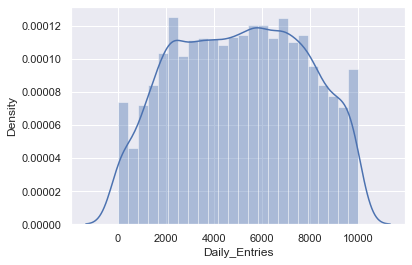

In [60]:
sns.distplot(stations_df['Daily_Entries']
             [stations_df['Daily_Entries'] < 50000])

investigate stations that have the same name but different locations

In [61]:
stations_daily = (stations_df.groupby(['STATION', 'DATE'])['Daily_Entries'].sum().reset_index())

stations_daily.head(10)

,STATION,DATE,Daily_Entries
0,1 AV,08/30/2020,7808.0
1,1 AV,08/31/2020,13014.0
2,1 AV,09/01/2020,6215.0
3,1 AV,09/02/2020,6635.0
4,1 AV,09/03/2020,6729.0
5,1 AV,09/04/2020,7043.0
6,1 AV,09/05/2020,5960.0
7,1 AV,09/06/2020,11913.0
8,1 AV,09/07/2020,9364.0
9,1 AV,09/08/2020,12271.0


In [62]:
top10_stations = \
    (stations_daily.groupby(['STATION'])['Daily_Entries'].sum()
                   .reset_index()
                   .sort_values(by='Daily_Entries',ascending=False) 
                   .STATION.head(10))
top10_stations.head(10)

44               23 ST
57      34 ST-PENN STA
208          FULTON ST
12               14 ST
102              86 ST
207    FT HAMILTON PKY
49               28 ST
5               116 ST
165     CATHEDRAL PKWY
329            WALL ST
Name: STATION, dtype: object

In [63]:
stations_daily_top10 = stations_df[stations_df['STATION'].isin(top10_stations)]

<AxesSubplot:xlabel='Daily_Entries', ylabel='STATION'>

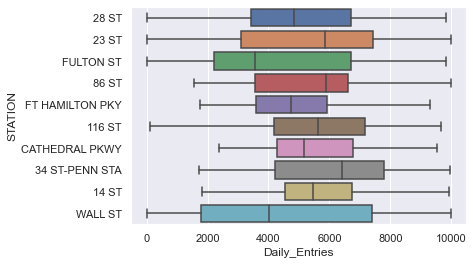

In [65]:
sns.boxplot('Daily_Entries', 'STATION', data=stations_daily_top10)

get top 25 stations

In [68]:
top25_stations = \
    (stations_daily.groupby(['STATION'])['Daily_Entries'].sum()
                   .reset_index()
                   .sort_values(by='Daily_Entries',ascending=False) 
                   .STATION.head(25))
top25_stations

44               23 ST
57      34 ST-PENN STA
208          FULTON ST
12               14 ST
102              86 ST
207    FT HAMILTON PKY
49               28 ST
5               116 ST
165     CATHEDRAL PKWY
329            WALL ST
8               125 ST
161           CANAL ST
73               50 ST
53               33 ST
139    BEDFORD PK BLVD
168        CHAMBERS ST
141          BERGEN ST
68               49 ST
178       CORTLANDT ST
239     KINGSBRIDGE RD
310          SPRING ST
9               135 ST
325     VERNON-JACKSON
238          KINGS HWY
336     WOODHAVEN BLVD
Name: STATION, dtype: object

In [69]:
stations_daily_top25 = stations_df[stations_df['STATION'].isin(top25_stations)]


/opt/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Daily_Entries', ylabel='STATION'>

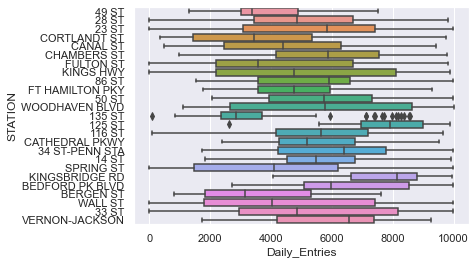

In [70]:
sns.boxplot('Daily_Entries', 'STATION', data=stations_daily_top25)